In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set styling
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Data paths
DATA_DIR = Path("C:\\Users\\dinesh.v006\\Documents\\GitHub\\fazri-anal-fastapi\\filtered")

print("📊 Campus Entity Resolution - Dataset Analysis")
print("="*60)

📊 Campus Entity Resolution - Dataset Analysis


In [8]:
def load_datasets():
    """Load all CSV datasets and return dict"""
    datasets = {}
    
    csv_files = {
        'profiles': 'student_staff_profiles.csv',
        'cctv': 'cctv_frames.csv',
        'swipes': 'campus_card_swipes.csv', 
        'wifi': 'wifi_associations_logs.csv',
        'library': 'library_checkouts.csv',
        'bookings': 'lab_bookings.csv',
        'helpdesk': 'helpdesk.csv',
        'face_embeddings': 'face_embeddings.csv'
    }
    
    for name, filename in csv_files.items():
        filepath = DATA_DIR / filename
        if filepath.exists():
            datasets[name] = pd.read_csv(filepath)
            print(f"✅ Loaded {name}: {len(datasets[name])} rows")
        else:
            print(f"❌ Missing {name}: {filename}")
    
    return datasets

# Load all data
data = load_datasets()

✅ Loaded profiles: 4860 rows
✅ Loaded cctv: 6015 rows
✅ Loaded swipes: 3710 rows
✅ Loaded wifi: 5617 rows
✅ Loaded library: 4826 rows
✅ Loaded bookings: 7000 rows
✅ Loaded helpdesk: 4825 rows
✅ Loaded face_embeddings: 3830 rows
✅ Loaded face_embeddings: 3830 rows


In [9]:
# Cell 3: Profile Data Analysis
print("\n🔍 STUDENT/STAFF PROFILES ANALYSIS")
print("="*60)

if 'profiles' in data:
    df = data['profiles']
    
    print(f"\nTotal Records: {len(df)}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nData Types:\n{df.dtypes}")
    print(f"\nFirst 5 Records:\n{df.head(200)}")
    
    # Identify all identifier columns
    id_columns = [col for col in df.columns if 'id' in col.lower() 
                  or col.lower() in ['email', 'card_id', 'device_hash', 'face_id', 'entity_id']]
    print(f"\n📋 Identifier Columns: {id_columns}")
    
    # Check for missing values in identifiers
    print(f"\n⚠️ Missing Values in Identifiers:")
    for col in id_columns:
        if col in df.columns:
            missing = df[col].isna().sum()
            missing_pct = (missing / len(df)) * 100
            print(f"  - {col}: {missing} ({missing_pct:.1f}%)")
    
    # Check for duplicates
    print(f"\n🔄 Duplicate Analysis:")
    for col in id_columns:
        if col in df.columns:
            duplicates = df[col].duplicated().sum()
            print(f"  - {col}: {duplicates} duplicates")
    
    # Name variations analysis
    if 'name' in df.columns:
        print(f"\n📝 Name Variations:")
        name_counts = df['name'].value_counts()
        print(f"  - Unique names: {len(name_counts)}")
        print(f"  - Names appearing >1 time: {(name_counts > 1).sum()}")


🔍 STUDENT/STAFF PROFILES ANALYSIS

Total Records: 4860

Columns: ['entity_id', 'name', 'role', 'email', 'department', 'student_id', 'staff_id', 'card_id', 'device_hash', 'face_id']

Data Types:
entity_id      object
name           object
role           object
email          object
department     object
student_id     object
staff_id       object
card_id        object
device_hash    object
face_id        object
dtype: object

First 5 Records:
    entity_id          name     role               email department  \
0     E100000    Neha Mehta  student    user0@campus.edu      CIVIL   
1     E100001    Neha Kumar  student    user1@campus.edu    Physics   
2     E100002    Neha Singh  student    user2@campus.edu      Admin   
3     E100003  Ishaan Desai  student    user3@campus.edu      Admin   
4     E100004   Rohan Desai  student    user4@campus.edu       MECH   
..        ...           ...      ...                 ...        ...   
195   E100195  Rohan Sharma  student  user195@campus.edu

In [10]:
# Cell 4: Card Swipe Analysis
print("\n🔍 CARD SWIPE LOGS ANALYSIS")
print("="*60)

if 'swipes' in data:
    df = data['swipes']
    
    print(f"\nTotal Swipes: {len(df)}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nSample Data:\n{df.head(20)}")
    
    # Convert timestamp
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Temporal analysis
    print(f"\n📅 Temporal Coverage:")
    print(f"  - Start: {df['timestamp'].min()}")
    print(f"  - End: {df['timestamp'].max()}")
    print(f"  - Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")
    
    # Location analysis
    if 'location_id' in df.columns:
        print(f"\n📍 Location Distribution:")
        print(df['location_id'].value_counts().head(10))
    
    # Unique entities
    if 'card_id' in df.columns:
        print(f"\n👥 Unique Cards: {df['card_id'].nunique()}")
        
    # Activity patterns
    df['hour'] = df['timestamp'].dt.hour
    print(f"\n⏰ Peak Activity Hours:")
    print(df['hour'].value_counts().sort_index().head(10))


🔍 CARD SWIPE LOGS ANALYSIS

Total Swipes: 3710

Columns: ['card_id', 'location_id', 'timestamp']

Sample Data:
   card_id  location_id            timestamp
0    C6840      LIB_ENT  2025-09-12 22:50:40
1    C4515   AUDITORIUM  2025-08-29 22:40:16
2    C8541      LIB_ENT  2025-09-17 09:29:02
3    C3771      LAB_101  2025-09-04 04:29:08
4    C1868      LAB_101  2025-09-10 12:18:52
5    C6996  ADMIN_LOBBY  2025-09-22 07:07:48
6    C7393      LAB_101  2025-09-14 13:47:33
7    C3066      LAB_305  2025-09-21 14:30:21
8    C8842       CAF_01  2025-09-01 09:37:46
9    C2754  ADMIN_LOBBY  2025-09-02 04:05:00
10   C9736   AUDITORIUM  2025-09-07 04:39:34
11   C3553      LAB_101  2025-09-07 15:21:41
12   C3489          GYM  2025-09-11 23:03:47
13   C4391  HOSTEL_GATE  2025-09-07 18:59:09
14   C7675  ADMIN_LOBBY  2025-09-10 05:41:17
15   C5104       CAF_01  2025-09-09 18:48:48
16   C7380          GYM  2025-09-07 16:50:03
17   C9257      LAB_305  2025-09-19 11:29:47
18   C6420      LIB_ENT  2025-09-

In [11]:
# Cell 5: Wi-Fi Logs Analysis
print("\n🔍 WI-FI LOGS ANALYSIS")
print("="*60)

if 'wifi' in data:
    df = data['wifi']
    
    print(f"\nTotal Wi-Fi Connections: {len(df)}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nSample Data:\n{df.head(20)}")
    
    # Convert timestamp
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Device analysis
    if 'device_hash' in df.columns:
        print(f"\n📱 Unique Devices: {df['device_hash'].nunique()}")
    
    # Access point analysis
    if 'ap_id' in df.columns:
        print(f"\n📡 Access Points:")
        print(df['ap_id'].value_counts().head(10))
    
    # Temporal patterns
    df['hour'] = df['timestamp'].dt.hour
    print(f"\n⏰ Connection Patterns by Hour:")
    hourly = df.groupby('hour').size()
    print(hourly.head(10))


🔍 WI-FI LOGS ANALYSIS

Total Wi-Fi Connections: 5617

Columns: ['device_hash', 'ap_id', 'timestamp']

Sample Data:
       device_hash       ap_id        timestamp
0   DHbb3a8ccad22b    AP_ENG_5   9/24/2025 5:50
1   DH19babb55cc1f    AP_CAF_3   9/24/2025 3:27
2   DH7fa70efe3b51    AP_ENG_1  8/27/2025 23:23
3   DHff9a91102bc2    AP_CAF_4   9/2/2025 18:06
4   DH13aa5d122330    AP_LIB_5  9/15/2025 21:57
5   DHef960e2685e9    AP_LAB_4  9/19/2025 15:42
6   DH19eeb8d20bf9    AP_CAF_5    9/4/2025 9:10
7   DHd4be9f5e0119    AP_AUD_4   9/14/2025 0:57
8   DH20928a69025e    AP_AUD_1  9/15/2025 16:37
9   DH02a167d2769d    AP_CAF_4  9/21/2025 17:18
10  DHf26a691e8d6d    AP_LAB_1  9/20/2025 13:47
11  DHc913ab24c56b    AP_CAF_5  9/15/2025 23:37
12  DH318f03f8ea59    AP_AUD_4   9/4/2025 10:33
13  DHbd69f807f836    AP_CAF_4   9/1/2025 11:23
14  DH456fd6c668e1    AP_LAB_4    9/7/2025 9:19
15  DHe41d8fe5ce1a    AP_AUD_2   9/2/2025 20:57
16  DH0ed6fd611e28    AP_AUD_5  8/29/2025 18:13
17  DH02f504c7bbb6  

In [12]:
# Cell 6: Library Checkouts Analysis
print("\n🔍 LIBRARY CHECKOUTS ANALYSIS")
print("="*60)

if 'library' in data:
    df = data['library']
    
    print(f"\nTotal Checkouts: {len(df)}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nSample Data:\n{df.head(20)}")
    
    # Identifier analysis
    id_cols = [col for col in df.columns if 'id' in col.lower() or col.lower() in ['timestamp']]
    print(f"\n🆔 Identifiers: {id_cols}")
    
    # Most borrowed items
    if 'item_id' in df.columns or 'book_id' in df.columns:
        item_col = 'item_id' if 'item_id' in df.columns else 'book_id'
        print(f"\n📚 Most Borrowed Items:")
        print(df[item_col].value_counts().head(10))


🔍 LIBRARY CHECKOUTS ANALYSIS

Total Checkouts: 4826

Columns: ['checkout_id', 'entity_id', 'book_id', 'timestamp']

Sample Data:
   checkout_id entity_id book_id            timestamp
0     LC200001   E105470  BK2116  2025-09-21 02:36:03
1     LC200002   E102616  BK2404  2025-09-12 23:46:25
2     LC200003   E103231  BK1049  2025-09-09 08:41:54
3     LC200005   E101939  BK2111  2025-09-20 04:08:24
4     LC200006   E101363  BK1580  2025-08-28 01:28:27
5     LC200007   E103931  BK2460  2025-09-18 23:47:13
6     LC200009   E101255  BK2780  2025-09-07 13:38:14
7     LC200010   E101143  BK2414  2025-09-23 10:09:18
8     LC200011   E105483  BK2984  2025-09-17 09:16:19
9     LC200012   E104167  BK1485  2025-09-10 04:08:49
10    LC200013   E102736  BK1178  2025-09-07 22:20:29
11    LC200014   E103231  BK2446  2025-08-28 23:21:59
12    LC200016   E105388  BK1434  2025-09-21 19:54:56
13    LC200017   E102684  BK1167  2025-09-13 14:46:13
14    LC200018   E102871  BK1923  2025-09-02 15:42:50
15    

In [13]:
# Cell 7: Helpdesk Notes Analysis
print("\n🔍 HELPDESK NOTES ANALYSIS")
print("="*60)

if 'helpdesk' in data:
    df = data['helpdesk']
    
    print(f"\nTotal Tickets: {len(df)}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nSample Data:\n{df.head(2000)}")
    
    # Text analysis
    if 'notes' in df.columns or 'description' in df.columns:
        text_col = 'notes' if 'notes' in df.columns else 'description'
        print(f"\n📝 Text Statistics:")
        print(f"  - Avg length: {df[text_col].str.len().mean():.0f} chars")
        print(f"  - Max length: {df[text_col].str.len().max()} chars")
        
        # Sample text
        print(f"\n📄 Sample Text:")
        print(df[text_col].iloc[0][:200] + "...")
    
    # Check for embedded identifiers in text
    print(f"\n🔍 Checking for identifiers in text...")
    if 'notes' in df.columns or 'description' in df.columns:
        text_col = 'notes' if 'notes' in df.columns else 'description'
        
        # Look for patterns
        import re
        email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
        id_pattern = r'\b[A-Z]{2,}\d{4,}\b'
        
        emails = df[text_col].str.extract(f'({email_pattern})', expand=False).dropna()
        ids = df[text_col].str.extract(f'({id_pattern})', expand=False).dropna()
        
        print(f"  - Found {len(emails)} potential emails")
        print(f"  - Found {len(ids)} potential IDs")


🔍 HELPDESK NOTES ANALYSIS

Total Tickets: 4825

Columns: ['note_id', 'entity_id', 'category', 'text', 'timestamp']

Sample Data:
      note_id entity_id     category  \
0     N400000   E101498         rsvp   
1     N400001   E101738     helpdesk   
2     N400002   E101590  maintenance   
3     N400003   E101144     feedback   
4     N400004   E102891     incident   
...       ...       ...          ...   
1995  N402856   E105756     helpdesk   
1996  N402857   E102789  maintenance   
1997  N402858   E103254         rsvp   
1998  N402860   E104940         rsvp   
1999  N402861   E102842     feedback   

                                             text            timestamp  
0     Confirmed attendance for robotics workshop.  2025-08-30 02:51:39  
1              Wi-Fi not working in hostel block.  2025-09-18 03:03:05  
2                  CCTV near library needs check.  2025-09-06 19:47:08  
3                   Broken chair in seminar room.  2025-09-19 09:05:20  
4              Wi-Fi not

In [14]:
# Cell 8: Face Embeddings Analysis
print("\n🔍 FACE EMBEDDINGS ANALYSIS")
print("="*60)

if 'face_embeddings' in data:
    df = data['face_embeddings']
    
    print(f"\nTotal Embeddings: {len(df)}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nSample Data:\n{df.head(20)}")
    
    # Check embedding dimensions
    embedding_cols = [col for col in df.columns if 'embed' in col.lower() or col.startswith('dim_')]
    print(f"\n🎯 Embedding Dimensions: {len(embedding_cols)}")
    
    # Unique faces
    if 'face_id' in df.columns or 'person_id' in df.columns:
        id_col = 'face_id' if 'face_id' in df.columns else 'person_id'
        print(f"\n👤 Unique Faces: {df[id_col].nunique()}")


🔍 FACE EMBEDDINGS ANALYSIS

Total Embeddings: 3830

Columns: ['face_id', 'embedding']

Sample Data:
        face_id                                          embedding
0   F100000.jpg  [0.07063741981983185, -0.07785087823867798, 0....
1   F100001.jpg  [-0.04066355526447296, 0.055565714836120605, 0...
2   F100002.jpg  [0.06908071041107178, -0.03698282316327095, 0....
3   F100003.jpg  [0.06868749856948853, -0.0016370370285585523, ...
4   F100004.jpg  [0.0008233249536715448, 0.02680845372378826, -...
5   F100005.jpg  [0.027631882578134537, -0.01428347546607256, 0...
6   F100006.jpg  [-0.057061817497015, -0.002985042054206133, 0....
7   F100007.jpg  [-0.02561454102396965, -0.022862102836370468, ...
8   F100008.jpg  [0.06797710061073303, -0.06732858717441559, -0...
9   F100009.jpg  [0.05554159730672836, -0.10543880611658096, -0...
10  F100010.jpg  [-0.009062577970325947, 0.04506639763712883, -...
11  F100011.jpg  [-0.05212102830410004, -0.002613164484500885, ...
12  F100012.jpg  [-0.0451114

In [15]:
# Cell 9: Cross-Dataset Identifier Mapping
print("\n🔍 CROSS-DATASET IDENTIFIER MAPPING")
print("="*60)

# Build identifier co-occurrence matrix
identifier_types = {
    'student_id': [],
    'entity_id': [],
    'staff_id': [],
    'email': [],
    'card_id': [],
    'device_hash': [],
    'face_id': []
}

# Check which datasets have which identifiers
for dataset_name, df in data.items():
    print(f"\n{dataset_name.upper()}:")
    for id_type in identifier_types.keys():
        if id_type in df.columns:
            count = df[id_type].notna().sum()
            unique = df[id_type].nunique()
            print(f"  ✅ {id_type}: {count} records, {unique} unique")
            identifier_types[id_type].append(dataset_name)
        else:
            print(f"  ❌ {id_type}: not present")

# Summary
print(f"\n📊 IDENTIFIER AVAILABILITY SUMMARY:")
print("="*60)
for id_type, datasets in identifier_types.items():
    if datasets:
        print(f"{id_type}: Found in {len(datasets)} datasets - {', '.join(datasets)}")
    else:
        print(f"{id_type}: Not found in any dataset")


🔍 CROSS-DATASET IDENTIFIER MAPPING

PROFILES:
  ✅ student_id: 3906 records, 3825 unique
  ✅ entity_id: 4860 records, 4860 unique
  ✅ staff_id: 954 records, 898 unique
  ✅ email: 4860 records, 4860 unique
  ✅ card_id: 4860 records, 4860 unique
  ✅ device_hash: 4860 records, 4860 unique
  ✅ face_id: 3830 records, 3830 unique

CCTV:
  ❌ student_id: not present
  ❌ entity_id: not present
  ❌ staff_id: not present
  ❌ email: not present
  ❌ card_id: not present
  ❌ device_hash: not present
  ✅ face_id: 3228 records, 2164 unique

SWIPES:
  ❌ student_id: not present
  ❌ entity_id: not present
  ❌ staff_id: not present
  ❌ email: not present
  ✅ card_id: 3710 records, 2210 unique
  ❌ device_hash: not present
  ❌ face_id: not present

WIFI:
  ❌ student_id: not present
  ❌ entity_id: not present
  ❌ staff_id: not present
  ❌ email: not present
  ❌ card_id: not present
  ✅ device_hash: 5617 records, 3330 unique
  ❌ face_id: not present

LIBRARY:
  ❌ student_id: not present
  ✅ entity_id: 4826 re

In [16]:
# Cell 10: Data Quality Assessment
print("\n🔍 DATA QUALITY ASSESSMENT")
print("="*60)

quality_report = {}

for name, df in data.items():
    print(f"\n{name.upper()}:")
    
    # Missing values
    missing = df.isna().sum()
    missing_pct = (missing / len(df)) * 100
    
    if missing.sum() > 0:
        print(f"  ⚠️ Columns with missing data:")
        for col, pct in missing_pct[missing_pct > 0].items():
            print(f"    - {col}: {pct:.1f}%")
    else:
        print(f"  ✅ No missing data")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"  ⚠️ Duplicate rows: {duplicates}")
    else:
        print(f"  ✅ No duplicate rows")
    
    quality_report[name] = {
        'total_rows': len(df),
        'missing_values': missing.sum(),
        'duplicates': duplicates
    }

# Overall quality score
print(f"\n📊 OVERALL DATA QUALITY:")
total_rows = sum(r['total_rows'] for r in quality_report.values())
total_missing = sum(r['missing_values'] for r in quality_report.values())
total_duplicates = sum(r['duplicates'] for r in quality_report.values())

completeness = (1 - total_missing / (total_rows * len(data))) * 100
print(f"  - Completeness: {completeness:.1f}%")
print(f"  - Total duplicates: {total_duplicates}")


🔍 DATA QUALITY ASSESSMENT

PROFILES:
  ⚠️ Columns with missing data:
    - student_id: 19.6%
    - staff_id: 80.4%
    - face_id: 21.2%
  ✅ No duplicate rows

CCTV:
  ⚠️ Columns with missing data:
    - face_id: 46.3%
  ✅ No duplicate rows

SWIPES:
  ✅ No missing data
  ✅ No duplicate rows

WIFI:
  ✅ No missing data
  ✅ No duplicate rows

LIBRARY:
  ✅ No missing data
  ✅ No duplicate rows

BOOKINGS:
  ✅ No missing data
  ✅ No duplicate rows

HELPDESK:
  ✅ No missing data
  ✅ No duplicate rows

FACE_EMBEDDINGS:
  ✅ No missing data
  ✅ No duplicate rows

📊 OVERALL DATA QUALITY:
  - Completeness: 97.3%
  - Total duplicates: 0


In [17]:
# Cell 11: Generate Analysis Summary Report
print("\n📝 GENERATING ANALYSIS SUMMARY REPORT")
print("="*60)

# Helper function to convert numpy/pandas types to native Python types
def convert_to_json_serializable(obj):
    """Convert numpy/pandas types to JSON-serializable Python types"""
    if isinstance(obj, dict):
        return {k: convert_to_json_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_json_serializable(item) for item in obj]
    elif isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif pd.isna(obj):
        return None
    else:
        return obj

report = {
    'dataset_overview': {
        'total_datasets': len(data),
        'total_records': sum(len(df) for df in data.values()),
        'datasets': {name: len(df) for name, df in data.items()}
    },
    'identifiers': {},
    'temporal_coverage': {},
    'data_quality': {}
}

# Convert quality report to JSON-serializable format
for name, stats in quality_report.items():
    report['data_quality'][name] = {
        'total_rows': int(stats['total_rows']),
        'missing_values': int(stats['missing_values']),
        'duplicates': int(stats['duplicates'])
    }

# Identifier summary
for id_type, datasets in identifier_types.items():
    if datasets:
        report['identifiers'][id_type] = {
            'available_in': datasets,
            'count': len(datasets)
        }

# Add temporal coverage if available
if 'swipes' in data:
    df = data['swipes'].copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    report['temporal_coverage']['swipes'] = {
        'start_date': df['timestamp'].min().isoformat(),
        'end_date': df['timestamp'].max().isoformat(),
        'duration_days': int((df['timestamp'].max() - df['timestamp'].min()).days)
    }

if 'wifi' in data:
    df = data['wifi'].copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    report['temporal_coverage']['wifi'] = {
        'start_date': df['timestamp'].min().isoformat(),
        'end_date': df['timestamp'].max().isoformat(),
        'duration_days': int((df['timestamp'].max() - df['timestamp'].min()).days)
    }

# Convert entire report to ensure all values are JSON serializable
report = convert_to_json_serializable(report)

# Save report
import json
report_path = Path("../../data/analysis/dataset_analysis_report.json")
report_path.parent.mkdir(parents=True, exist_ok=True)

with open(report_path, 'w') as f:
    json.dump(report, f, indent=2, default=str)  # Added default=str as fallback

print(f"✅ Report saved to: {report_path}")
print(f"\n📊 Analysis Summary:")
print(json.dumps(report, indent=2))

# Also save a human-readable markdown report
md_report_path = Path("../../data/analysis/dataset_analysis_report.md")

with open(md_report_path, 'w') as f:
    f.write("# Dataset Analysis Report\n\n")
    f.write(f"**Generated:** {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    
    f.write("## Dataset Overview\n\n")
    f.write(f"- **Total Datasets:** {report['dataset_overview']['total_datasets']}\n")
    f.write(f"- **Total Records:** {report['dataset_overview']['total_records']:,}\n\n")
    
    f.write("### Records per Dataset\n\n")
    f.write("| Dataset | Records |\n")
    f.write("|---------|--------:|\n")
    for name, count in report['dataset_overview']['datasets'].items():
        f.write(f"| {name} | {count:,} |\n")
    
    f.write("\n## Identifier Mapping\n\n")
    f.write("| Identifier | Available In | Dataset Count |\n")
    f.write("|------------|--------------|---------------:|\n")
    for id_type, info in report['identifiers'].items():
        datasets_str = ', '.join(info['available_in'])
        f.write(f"| {id_type} | {datasets_str} | {info['count']} |\n")
    
    f.write("\n## Data Quality\n\n")
    f.write("| Dataset | Total Rows | Missing Values | Duplicates |\n")
    f.write("|---------|------------|----------------|------------|\n")
    for name, stats in report['data_quality'].items():
        f.write(f"| {name} | {stats['total_rows']:,} | {stats['missing_values']:,} | {stats['duplicates']:,} |\n")
    
    if report['temporal_coverage']:
        f.write("\n## Temporal Coverage\n\n")
        for dataset, coverage in report['temporal_coverage'].items():
            f.write(f"### {dataset.title()}\n")
            f.write(f"- Start: {coverage['start_date']}\n")
            f.write(f"- End: {coverage['end_date']}\n")
            f.write(f"- Duration: {coverage['duration_days']} days\n\n")

print(f"✅ Markdown report saved to: {md_report_path}")


📝 GENERATING ANALYSIS SUMMARY REPORT
✅ Report saved to: ..\..\data\analysis\dataset_analysis_report.json

📊 Analysis Summary:
{
  "dataset_overview": {
    "total_datasets": 8,
    "total_records": 40683,
    "datasets": {
      "profiles": 4860,
      "cctv": 6015,
      "swipes": 3710,
      "wifi": 5617,
      "library": 4826,
      "bookings": 7000,
      "helpdesk": 4825,
      "face_embeddings": 3830
    }
  },
  "identifiers": {
    "student_id": {
      "available_in": [
        "profiles"
      ],
      "count": 1
    },
    "entity_id": {
      "available_in": [
        "profiles",
        "library",
        "bookings",
        "helpdesk"
      ],
      "count": 4
    },
    "staff_id": {
      "available_in": [
        "profiles"
      ],
      "count": 1
    },
    "email": {
      "available_in": [
        "profiles"
      ],
      "count": 1
    },
    "card_id": {
      "available_in": [
        "profiles",
        "swipes"
      ],
      "count": 2
    },
    "device_h

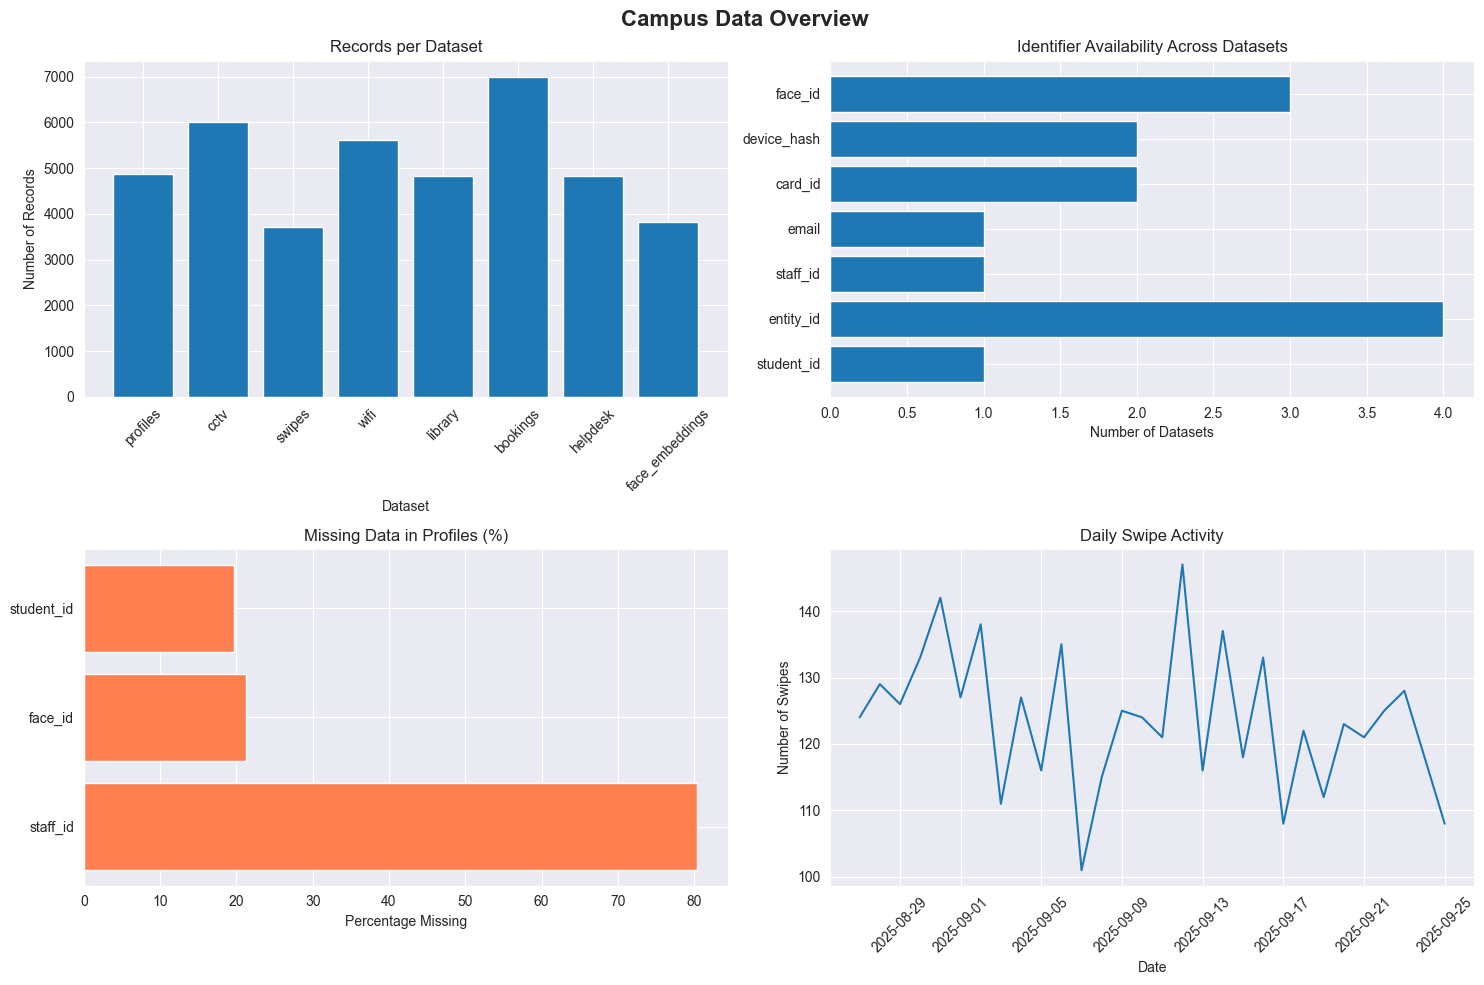

✅ Visualization saved to: data/analysis/dataset_overview.png


In [18]:
# Cell 12: Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Campus Data Overview', fontsize=16, fontweight='bold')

# 1. Dataset sizes
if data:
    dataset_sizes = {name: len(df) for name, df in data.items()}
    axes[0, 0].bar(dataset_sizes.keys(), dataset_sizes.values())
    axes[0, 0].set_title('Records per Dataset')
    axes[0, 0].set_xlabel('Dataset')
    axes[0, 0].set_ylabel('Number of Records')
    axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Identifier availability
if identifier_types:
    id_counts = {k: len(v) for k, v in identifier_types.items() if v}
    axes[0, 1].barh(list(id_counts.keys()), list(id_counts.values()))
    axes[0, 1].set_title('Identifier Availability Across Datasets')
    axes[0, 1].set_xlabel('Number of Datasets')

# 3. Missing data percentage
if 'profiles' in data:
    df = data['profiles']
    missing_pct = (df.isna().sum() / len(df)) * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    if len(missing_pct) > 0:
        axes[1, 0].barh(missing_pct.index, missing_pct.values, color='coral')
        axes[1, 0].set_title('Missing Data in Profiles (%)')
        axes[1, 0].set_xlabel('Percentage Missing')

# 4. Temporal distribution (if swipes data available)
if 'swipes' in data:
    df = data['swipes'].copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    daily_counts = df.groupby('date').size()
    axes[1, 1].plot(daily_counts.index, daily_counts.values)
    axes[1, 1].set_title('Daily Swipe Activity')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Number of Swipes')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../../data/analysis/dataset_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved to: data/analysis/dataset_overview.png")